<a href="https://colab.research.google.com/github/ralph27/Matplotlib-visualization/blob/master/Logistic_Regression_From_Scratch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Logistic Regression From Scratch Using Gradient Descent**
© 2024, Zaka AI, Inc. All Rights Reserved.

---
**Objectives:** The goal of this notebook is to build from scratch the Gradient Descent algorithm and apply it on an example involving one only feature for a classification problem, and then see in action how to evaluate classifiers and choose the best of them.

#Importing Libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

#Visualizing the sigmoid function

In [ ]:
def sigmoid(v):
  return 1/(1+np.exp(-v))

We take a range between -10 and 10, and plot the corresponding sigmoid function

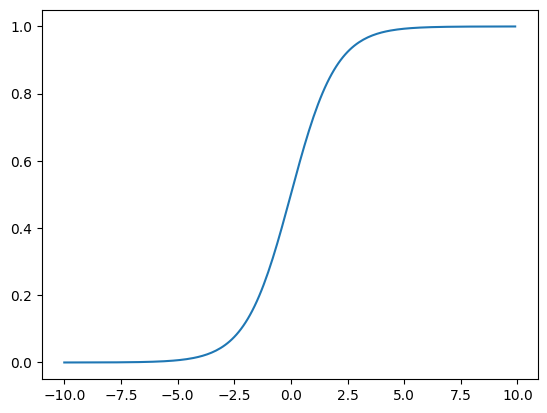

In [ ]:
x = np.arange(-10,10,0.1)
y = sigmoid (x)
plt.plot(x,y)

#Gradient Descent

The same idea for GD that we coded in the linear regression chapter applies here, with one only difference which is the derivatives.

In [ ]:
def Gradient_descent (x, y, learning_rate, nb_iterations, initial_a0, initial_a1):
  n = x.shape [0] #number of points
  a0 = initial_a0
  a1 = initial_a1

  for i in range (nb_iterations):
    y_pred = sigmoid(a1 * x + a0)
    a0_der = -1*np.sum(y - y_pred)/n
    a1_der = -1*np.sum(x * (y - y_pred))/n
    a0 = a0 - learning_rate * a0_der
    a1 = a1 - learning_rate * a1_der

  return a0, a1

#Applications

##Funny or Not Funny ?

Assume we want to classify a person if they is funny (1) or not (0), based on the number of "Haha"s that they receive. The purpose of this example is to illustrate what Gradient Descent does on a single feature example. <br>

The following sample dataset is the one that we'll use for training our model.

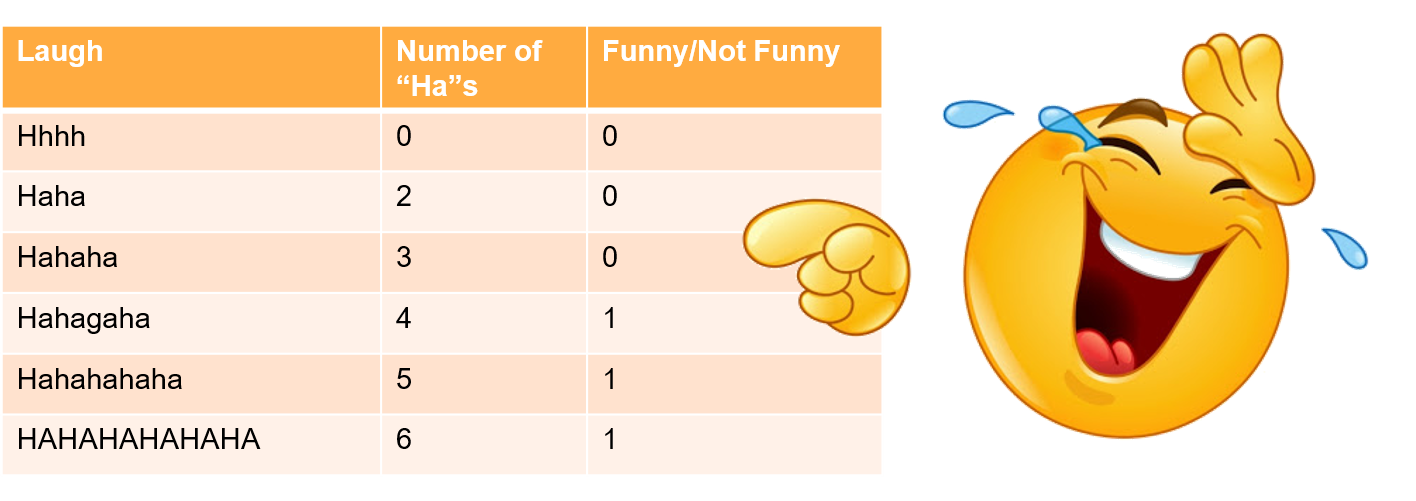

In [ ]:
x = np.array([0, 2, 3, 4, 5, 6])
y = np.array([0, 0, 0, 1, 1, 1])

initial_a0 = 0.5
initial_a1 = -1

learning_rate = 0.01

nb_iterations = 10000

a0, a1 = Gradient_descent(x,y,learning_rate, nb_iterations, initial_a0, initial_a1)

print ("Equation is: ", a0,"+",a1,"x")

Equation is:  -5.402307896989677 + 1.6277170978714393 x


Let's visualize what was done by Gradient Descent:

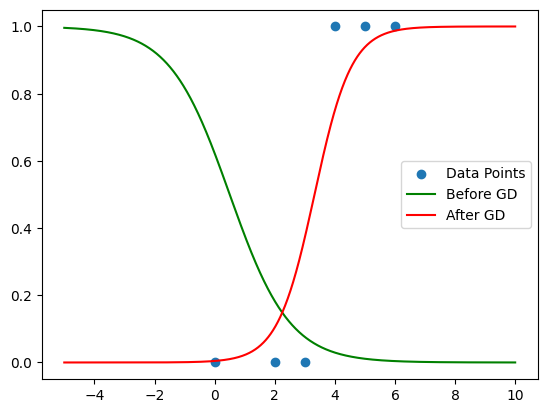

In [ ]:
x_axis = np.arange(-5,10,0.01)
y_initial = initial_a0 + initial_a1 * x_axis
y_final = a0 + a1 * x_axis

plt.scatter(x,y, label='Data Points')
#plt.plot(x_axis, y_final, 'g', label = 'Seperation Line' )
plt.plot(x_axis, sigmoid(y_initial), 'g', label = 'Before GD')
plt.plot(x_axis, sigmoid(y_final), 'r', label='After GD')
plt.legend()
plt.show()

This example is simple but it is powerful at the same time because it makes us see the effect of gradient descent on the logistic function. This is important since when the number of features start to increase, we won't be able to visualize something that we can easily understand.

## Evaluating Two COVID-19 Detectors

In this section, we will compare 2 COVID-19 classifiers in order to know which one is the best. <br>
Below, we have the true data which consists of persons having COVID - or testing positive (1), and people who are COVID free (0), along with predictions collected from 2 hypothetical classifiers.

We need to evaluate and discuss which one is the best.



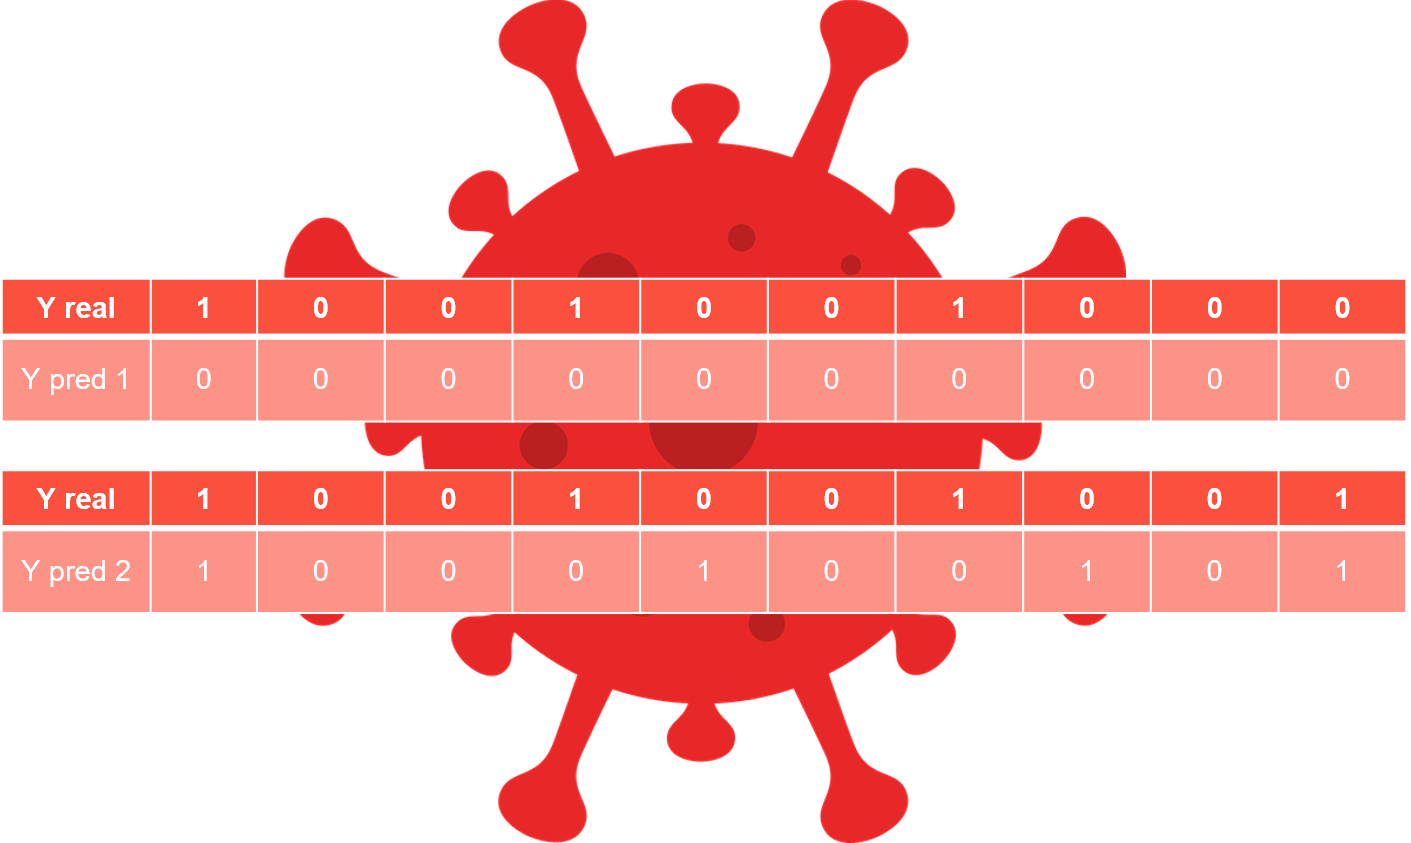

In order to evaluate your classifier, you need to have the original true data, along with the data that your model gave as output.<br> In this section, we'll try to code some of the metrics that we learned about during the course.

In [ ]:
y_real = np.array([1, 0, 0, 1, 0, 0, 1, 0, 0, 0])

y_pred_1 = np.array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0]) # model 1 predictions
y_pred_2 = np.array([1, 0, 0, 0, 1, 0, 0, 1, 0, 1]) # model 2 predictions

We need to make sure that all the data exists and nothing is missing, this is why we assert that the 3 rows of data have the same size.

In [ ]:
n = y_real.shape[0]
assert n==y_pred_1.shape[0]==y_pred_2.shape[0]

###Misclassified outputs

We start by observing how many times each classifier was wrong:

In [ ]:
y_wrong_1 = np.count_nonzero(y_real - y_pred_1, axis = 0)
y_wrong_2 = np.count_nonzero(y_real - y_pred_2, axis = 0)

print("Classifier 1 has ", y_wrong_1, " misclassified outputs")
print("Classifier 2 has ", y_wrong_2, " misclassified outputs")

Classifier 1 has  3  misclassified outputs
Classifier 2 has  5  misclassified outputs


###Misclassification Rate

To get a clearer idea, we compute the rate of wrong classifiactions that were made by the 2 classifiers:

In [ ]:
miss_rate_1 = float(y_wrong_1) / n
miss_rate_2 = float(y_wrong_2) / n

print("Classifier 1 has a misclassification rate of ", miss_rate_1*100, "%")
print("Classifier 2 has a misclassification rate of ", miss_rate_2*100, "%")

Classifier 1 has a misclassification rate of  30.0 %
Classifier 2 has a misclassification rate of  50.0 %


###Accuracy Score

Now we need to see how much each classifier was right. <br>
This measure is kind of the complementary to the previous one.

In [ ]:
y_correct_1 = n - y_wrong_1
y_correct_2 = n - y_wrong_2

print("Classifier 1 has ", y_correct_1, " good classified outputs")
print("Classifier 2 has ", y_correct_2, " good classified outputs")

accuracy_1 = float(y_correct_1) / n
accuracy_2 = float(y_correct_2) / n

print("Classifier 1 has an accuracy score of ", accuracy_1*100, "%")
print("Classifier 2 has an accuracy score of ", accuracy_2*100, "%")

Classifier 1 has  7  good classified outputs
Classifier 2 has  5  good classified outputs
Classifier 1 has an accuracy score of  70.0 %
Classifier 2 has an accuracy score of  50.0 %


It's clear that classifier 1 is more accurate than classifier 2.

**This means we should use it, Right ?!** <br>
Well, let's see..

###Confusion Matrix (TP, TN, FP, FN)

Now we need to know the true positives, true negatives, false positives, and false negatives in each classifier. We use the sklearn library to get the confusion matrix. <br>

The function `.ravel()` is used to transform a multidimensional array into a single dimension. <br>

In [ ]:
from sklearn.metrics import confusion_matrix

TN_1, FP_1, FN_1, TP_1 = confusion_matrix(y_real, y_pred_1).ravel()
TN_2, FP_2, FN_2, TP_2 = confusion_matrix(y_real, y_pred_2).ravel()

conf_1 = confusion_matrix(y_real, y_pred_1)
conf_2 = confusion_matrix(y_real, y_pred_2)

print("Confusion Matrix 1:")
print(conf_1)

print("Confusion Matrix 2:")
print(conf_2)

Confusion Matrix 1:
[[7 0]
 [3 0]]
Confusion Matrix 2:
[[4 3]
 [2 1]]


Notice the order of the measures in the matrix. It's different than the one we saw in the course, but of course the concept is the same. The difference is only in the location of the measure inside of the matrix.

###TPR, TNR, FPR, FNR

Now we can calculate the rates through the formulas that we learned in the course.

In [ ]:
# Rates for model 1
TPR_1 = float(TP_1) / np.sum(y_real)
TNR_1 = float(TN_1) / (n - np.sum(y_real))
FPR_1 = float(FP_1) / (n - np.sum(y_real))
FNR_1 = float(FN_1) / np.sum(y_real)

# Rates for model 2
TPR_2 = float(TP_2) / np.sum(y_real)
TNR_2 = float(TN_2) / (n - np.sum(y_real))
FPR_2 = float(FP_2) / (n - np.sum(y_real))
FNR_2 = float(FN_2) / np.sum(y_real)

# Comaprison!
print ("TPR --> 1: ", TPR_1, " 2: ", TPR_2)
print ("TNR --> 1: ", TNR_1, " 2: ", TNR_2)
print ("FPR --> 1: ", FPR_1, " 2: ", FPR_2)
print ("FNR --> 1: ", FNR_1, " 2: ", FNR_2)

TPR --> 1:  0.0  2:  0.3333333333333333
TNR --> 1:  1.0  2:  0.5714285714285714
FPR --> 1:  0.0  2:  0.42857142857142855
FNR --> 1:  1.0  2:  0.6666666666666666


Now here the picture becomes clearer while observing theses results. <br>

Classifier 1 has 0 as TPR and 1 as FNR, which means that the 1st classifier (even if it has better accuracy) is not able to spot a positive person, and this is why in such application we would rather use the 2nd classifier instead **(because despite of it being less accurate, it was able to spot more positive cases - which is more urgent in a medical application such as Covid-19 detection.)**

###Precision

Now here's another metric to validate what we have discussed which is the precision, which tells us how likely we are to be correct when we’re predicting a positive label.<br>

In [ ]:
P_1 = float(TP_1)/np.sum(y_pred_1)
P_2 = float(TP_2)/np.sum(y_pred_2)

print ("Precision --> 1: ", P_1, " 2: ", P_2)

Precision --> 1:  nan  2:  0.25


<ipython-input-14-5fc965f840fa>:1: RuntimeWarning: invalid value encountered in divide
  P_1 = float(TP_1)/np.sum(y_pred_1)


The precision of the 1st classifier is NaN which means that **it did not predicted ANY positives**. Again, this is concerning in an application such as ours and why this classifier is somehow useless because it can not detect COVID-19 apparently, even though it was shown to be more accurate!


So from this section, we learned that each metric tell us a side of the story of how well our classifier is performing, and we should always look at different metrics in order to decide if our classifier is performing well or not.